In [1]:
# Improting all the required libraries and packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')
%matplotlib inline


/home/dell/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Prepartion of data
# Organization of data into train,test,valid data
os.chdir('/home/dell/Python files/Cats Vs Dogs data')
if os.path.isdir('train/Dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train/cat')
        
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
        
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
        
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
        
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
        
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')

os.chdir('../../')


FileExistsError: [Errno 17] File exists: 'train/dog'

### Running the code more than once generates this error since the folders have already been created

In [38]:
pwd

'/home/dell/Python files/Cats Vs Dogs data'

In [21]:
os.chdir('../../')

In [39]:
pwd

'/home/dell/Python files/Cats Vs Dogs data'

In [44]:
pwd

'/home/dell/Python files/Cats Vs Dogs data'

In [3]:
train_path='/home/dell/Previsous Desktop/Pictures/dogs-vs-cats/train/train'
valid_path='/home/dell/Previsous Desktop/Pictures/dogs-vs-cats/train/valid'
test_path='/home/dell/Previsous Desktop/Pictures/dogs-vs-cats/train/test'


In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224),classes=['cat','dog'],batch_size=10)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes==valid_batches.num_classes==test_batches.num_classes==2


In [8]:
imgs,labels=next(train_batches)

In [13]:
# Function so as to plot the images
def plotImages(images_arr):
    fig,axes=plt.subplots(1,20,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show()
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


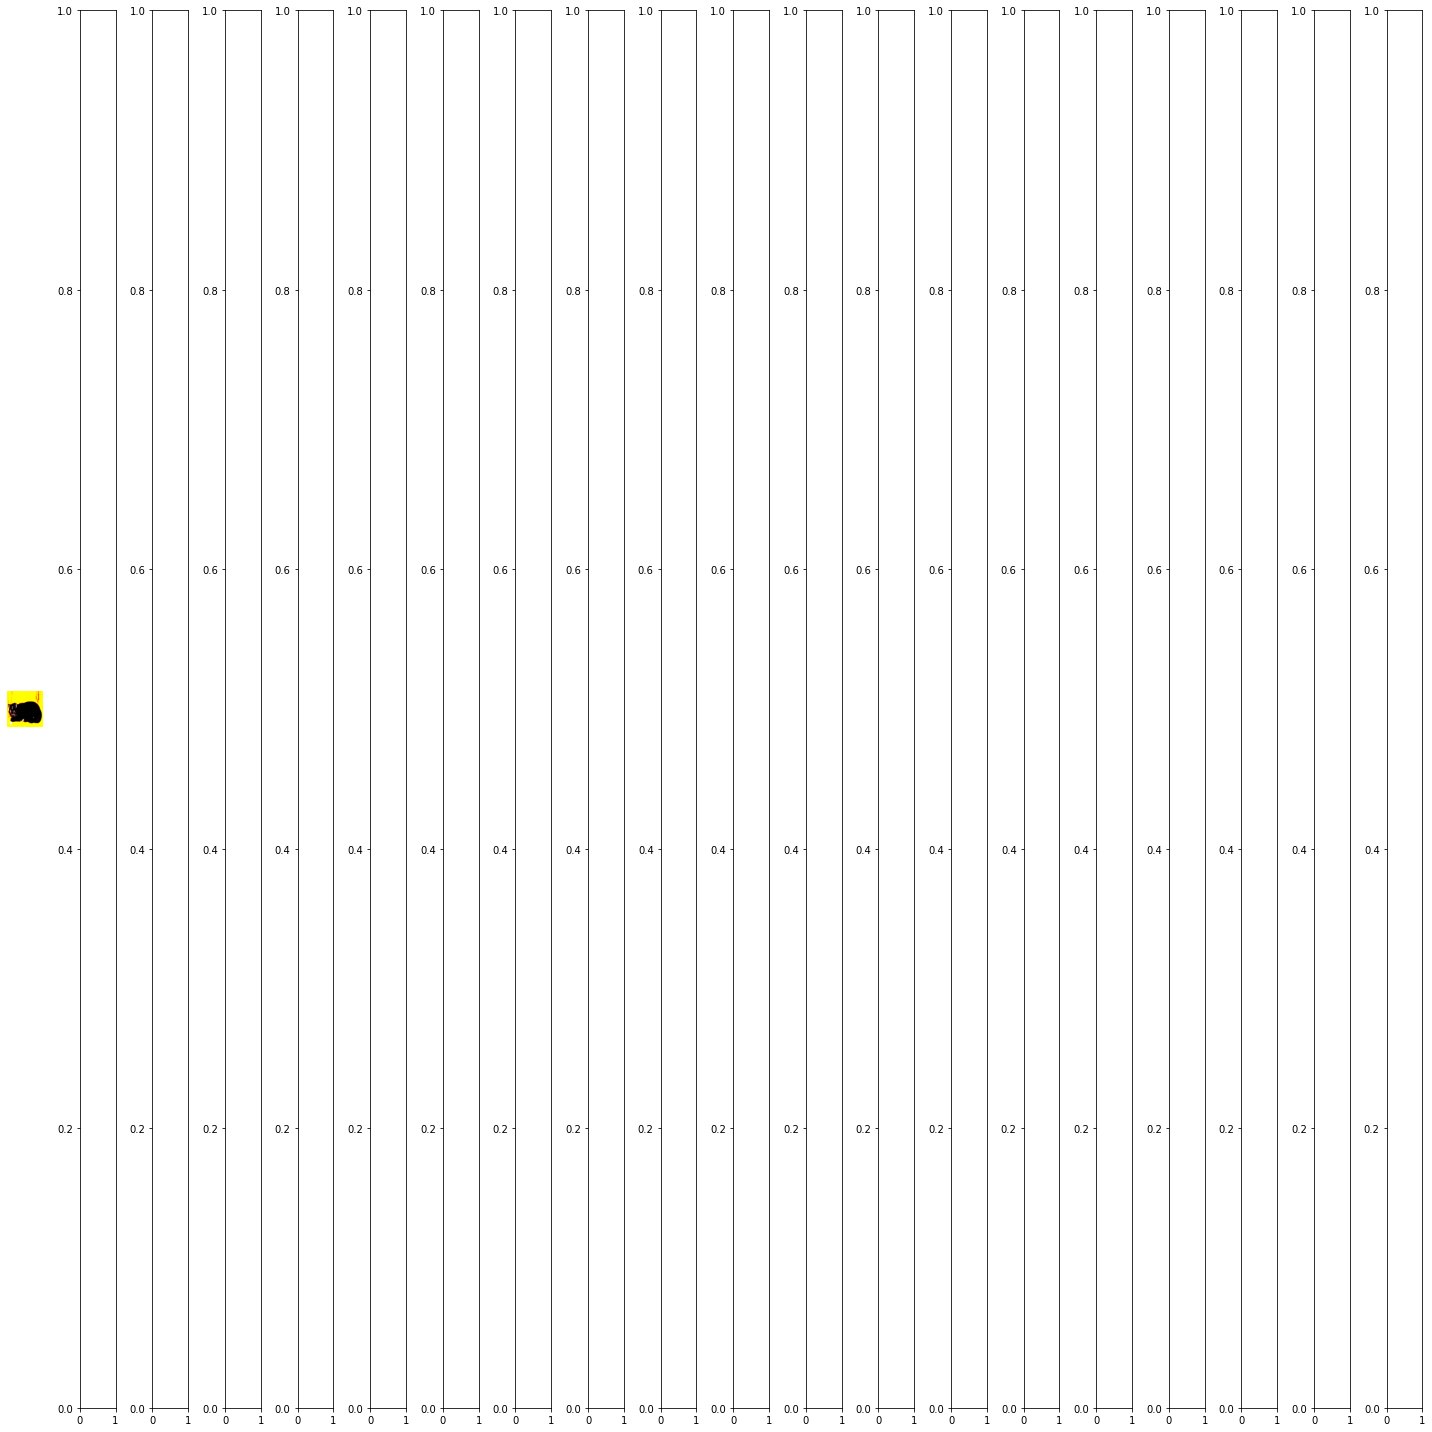

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [17]:
plotImages(imgs)
print(labels)

### [1. 0.] represents a cat and [0. 1.] represents a dog

In [18]:
model=Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
    


])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['Accuracy'])

In [21]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 75s - loss: 11.5909 - accuracy: 0.1720 - val_loss: 5.7007 - val_accuracy: 0.1550
Epoch 2/10
100/100 - 102s - loss: 1.9446 - accuracy: 0.1630 - val_loss: 2.8521 - val_accuracy: 0.0725
Epoch 3/10
100/100 - 100s - loss: 0.4470 - accuracy: 0.1800 - val_loss: 2.0856 - val_accuracy: 0.0500
Epoch 4/10
100/100 - 99s - loss: 0.0862 - accuracy: 0.1915 - val_loss: 2.5356 - val_accuracy: 0.0650
Epoch 5/10
100/100 - 93s - loss: 0.0717 - accuracy: 0.2190 - val_loss: 2.5119 - val_accuracy: 0.0675
Epoch 6/10
100/100 - 109s - loss: 0.0663 - accuracy: 0.2315 - val_loss: 2.7414 - val_accuracy: 0.0750
Epoch 7/10
100/100 - 104s - loss: 0.0120 - accuracy: 0.2330 - val_loss: 2.6596 - val_accuracy: 0.0875
Epoch 8/10
100/100 - 106s - loss: 0.0059 - accuracy: 0.2285 - val_loss: 2.2571 - val_accuracy: 0.0700
Epoch 9/10
100/100 - 97s - loss: 0.0019 - accuracy: 0.2315 - val_loss: 2.3170 - val_accuracy: 0.0650
Epoch 10/10
100/100 - 88s - loss: 3.2418e-04 - accuracy: 0.2370 - val_loss: 2.3131 - 

In [ ]:
## The accuracies are low which can be improved by further fine tuning of parameters